## Visualize overlap ratio

In [12]:
import os
from data_process import stream_jsonl
from cal_overlap import extract_overlap_rate


data_folder = '../data/overlap_v1'

groups_in_interest = ['year2019', 'year2020', 'year2021', 'numpy', 'pandas', 'refactor_np_apd', 'refactor_np_shuffles', 'refactor_pd_apd', 'refactor_pd_shuffles']

overlap_list = []

for group in groups_in_interest:
    file = os.path.join(data_folder, f'{group}.txt')
    
    # if not os.path.exists(file):
        # continue
    
    cur_lines = extract_overlap_rate(file, remove_zero=False)

    print(len(cur_lines), min(cur_lines), max(cur_lines))
    overlap_list.append(cur_lines)

print(len(overlap_list), len(overlap_list[0]))

384 0.0 1.0
384 0.0 1.0
384 0.0 1.0
477 0.0 1.0
517 0.0 0.9960474308300395
215 0.32310177705977383 0.999096657633243
273 0.0 1.0
284 0.0 0.9877977919814062
356 0.0 0.9941804073714839
9 384


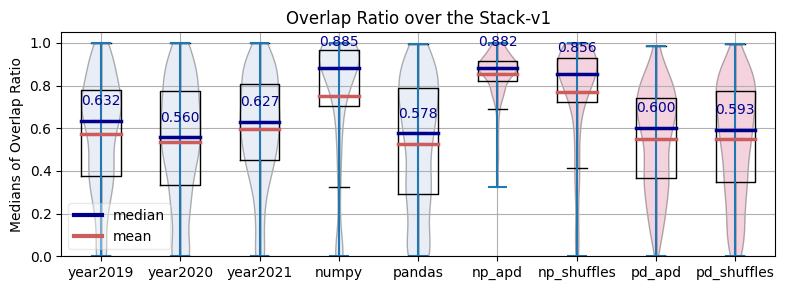

In [117]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# figure size and axs
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))

# FYI. groups_in_interest = ['year2019', 'year2020', 'year2021', 'numpy', 'pandas', 'refactor_np_apd', 'refactor_np_shuffles', 'refactor_pd_apd', 'refactor_pd_shuffles']
labels = [x.replace('refactor_', '').replace('year_', '') for x in groups_in_interest]

# highlight the refactored vectors
refactored_vectors = [0, 0, 0, 0, 0, 1, 1, 1, 1]
color_mapping = {0: '#B7C5E3', 1: 'palevioletred'}  # '#B7C5E3'

#################################################
axs.set_title('Overlap Ratio over the Stack-v1', fontsize=12)

# bar
axs.boxplot(overlap_list, showfliers=False, notch=False, medianprops=dict(linestyle='-', linewidth=2.5, color='darkblue'), showmeans=True, meanline=True, meanprops=dict(linestyle='-', linewidth=2.5, color='indianred'))
# patch_artist=True, boxprops=dict(facecolor='white', color='olivedrab'),

# violin
violin_parts = axs.violinplot(overlap_list, showmeans=True, showmedians=True)

for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(color_mapping[refactored_vectors[i]])
    pc.set_edgecolor('black')
    
# x-axis and y-axis
axs.set_xticks(np.arange(1, len(labels) + 1), labels=labels, fontsize=10)
axs.yaxis.grid(True)
axs.xaxis.grid(True)
axs.set_ylabel('Medians of Overlap Ratio')

# legend
legend_elements = [Line2D([0], [0], color='darkblue', lw=3, label='median'),
                   Line2D([0], [0], color='indianred', lw=3, label='mean'),
                   ]
axs.legend(handles=legend_elements,  loc='lower left', fancybox=True, framealpha=0.4)

# show texts
for i, overlap in enumerate(overlap_list):
    median_val = np.median(overlap)
    axs.text(i + 1, median_val * 1.1, f'{median_val:.3f}', ha='center', va='bottom', color='darkblue', fontsize=10)
    
    # mean_val = np.mean(overlap) 
    # axs.text(i + 1, mean_val * 1.0, f'{mean_val:.3f}', ha='center', va='bottom', color='deeppink', fontsize=10)

plt.gca().set_ylim(bottom=0.0)
plt.tight_layout()
plt.grid(True)
# plt.show()
# plt.savefig('../Figure/overlap_v1.png')

## Overlap Trend

Can be used in RQ1 - RQ4


In [1]:
import numpy as np

# RQ1

In [6]:
pathAtag = [
 ('../data/overlap_v1_2021new/overlapinfill_refactor_norefactorsraw.txt', 'Original'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_if.txt', 'IFF'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_loop.txt', 'Loop'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_list2range.txt', 'Iter'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_comm-law.txt', 'Comm'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_fn-decorator.txt', 'Deco'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_param.txt', 'Param'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_var-renamer.txt', 'Renm'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_norefactors.txt','Norm'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_camel-snake-case.txt', 'Styl'),
]

dataAtag = []
for path, tag in pathAtag:
    with open(path) as f:
        question_id = None
        qid2overlaprate = {}
        for line in f.readlines():
            if line.startswith('Question ID: '):
                assert question_id is None
                question_id = line[len("Question ID: "):].strip()
            if line.startswith('<Overlap Ratio: '):
                assert question_id is not None
                assert question_id not in qid2overlaprate
                qid2overlaprate[question_id] = float(line.split('<Overlap Ratio: ')[1].split('>')[0])
                question_id = None
        qidAoverlaprate = sorted(list(qid2overlaprate.items()), key= lambda x: x[0])
#         print(tag)
#         print(qidAoverlaprate[:2])
    dataAtag.append( (np.array([o for q, o in qidAoverlaprate]), tag) )
    print(tag, len(dataAtag[-1][0]), sep='\t')

Original	384
IFF	384
Loop	384
Iter	384
Comm	384
Deco	384
Param	384
Renm	384
Norm	384
Styl	384


/tmp/ipykernel_3669650/2121945355.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  height = means[i]
/tmp/ipykernel_3669650/2121945355.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=data.mean()[0], color=shadow_colors[1], linestyle='--', linewidth=1.5, alpha=0.7)
/tmp/ipykernel_3669650/2121945355.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(1.28, data.mean()[0], f'Original Mean: {data.mean()[0]

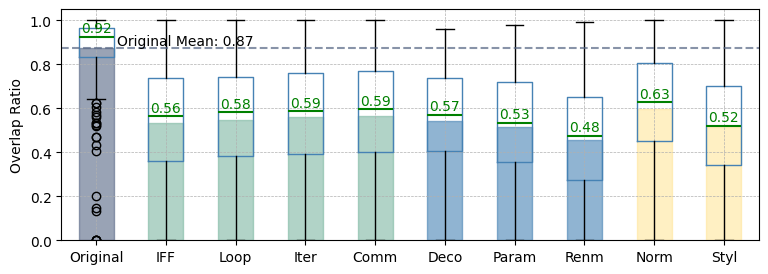

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.DataFrame({tag: data for data, tag in dataAtag})

# Box plot data
box_data = [data[col] for col in data.columns]

# Bar plot data (means)
means = data.mean()
medians = data.median()

# Create figure and axis
fig, ax = plt.subplots(figsize=(9, 3))

# Bar plot with shadow areas
# NOTES: These are four colors for four RQs !!!
# shadow_colors = ['#DA6883', '#566684', '#7DB7A2', 'steelblue']
shadow_colors = ['#DA6883', '#566684', '#7DB7A2', 'steelblue', '#FFE69B']
bars = ax.bar(data.columns, means, alpha=0, color=shadow_colors[3], label='Mean')
ax.set_ylabel('Overlap Ratio')

# Box plot
ax.boxplot(box_data, 
           positions=np.arange(len(data.columns)), 
           widths=0.5, 
           showfliers=True,
           medianprops=dict(linestyle='-', linewidth=1.5, color='green'),
           boxprops=dict(color='steelblue')
           )

# Add shadow areas using the mean of each bar
# for i, bar in enumerate(bars):
#     height = means[i]
#     ax.fill_between([i - 0.25, i + 0.25], 0, height, color='#566684', alpha=0.2)

# Add shadow areas using the mean of each bar
for i, bar in enumerate(bars):
    if i in [0]:
        cur_color = shadow_colors[1]
    elif i in [1, 2, 3, 4]:
        cur_color = shadow_colors[2]
    elif i in [5, 6, 7]:
        cur_color = shadow_colors[3]
    else:
        cur_color = shadow_colors[4]
        
    height = means[i]
    ax.fill_between([i - 0.25, i + 0.25], 0, height, color=cur_color, alpha=0.6)

# Set x-ticks
ax.set_xticks(np.arange(len(data.columns)))
ax.set_xticklabels(data.columns)

# write texts in the bars
for i, mean in enumerate(medians):
    ax.text(i, mean + 0.006, f'{mean:.2f}', ha='center', va='bottom', color='green', fontsize=10)

# add a horizontal line
ax.axhline(y=data.mean()[0], color=shadow_colors[1], linestyle='--', linewidth=1.5, alpha=0.7) 
# add a text
ax.text(1.28, data.mean()[0], f'Original Mean: {data.mean()[0]:.2f}', ha='center', va='bottom', color='black', fontsize=10)
ax.set_ylim(0, 1.05)

# Show grid
ax.grid(True, linestyle='--', linewidth=0.5)

# Show plot
# plt.title('Combined Bar and Box Plot with Mean Shading')
# plt.show()
plt.savefig('../Figure/RQ1-1.png', bbox_inches='tight', pad_inches=0)

In [2]:
pathAtag = [
 ('../data/overlap_v1_2021new/overlapinfill_refactor_norefactorsraw.txt', 'Original'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_all.txt', 'Refactored'),
]

dataAtag = []
for path, tag in pathAtag:
    with open(path) as f:
        question_id = None
        qid2overlaprate = {}
        for line in f.readlines():
            if line.startswith('Question ID: '):
                assert question_id is None
                question_id = line[len("Question ID: "):].strip()
            if line.startswith('<Overlap Ratio: '):
                assert question_id is not None
                assert question_id not in qid2overlaprate
                qid2overlaprate[question_id] = float(line.split('<Overlap Ratio: ')[1].split('>')[0])
                question_id = None
        qidAoverlaprate = sorted(list(qid2overlaprate.items()), key= lambda x: x[0])
        print(tag)
        print(qidAoverlaprate[:2])
    dataAtag.append( (np.array([o for q, o in qidAoverlaprate]), tag) )
    print(tag, len(dataAtag[-1][0]), sep='\t')

Original
[('00500ee126bf98712c024187bb2a8536d5e82f46_0', 0.9632701421800948), ('00cef5ab0b6c71719e9da7da7a1b9a6407ebc5d7_0', 0.973605577689243)]
Original	384
Refactored
[('00500ee126bf98712c024187bb2a8536d5e82f46_0', 0.4133771929824561), ('00cef5ab0b6c71719e9da7da7a1b9a6407ebc5d7_0', 0.33962264150943394)]
Refactored	384


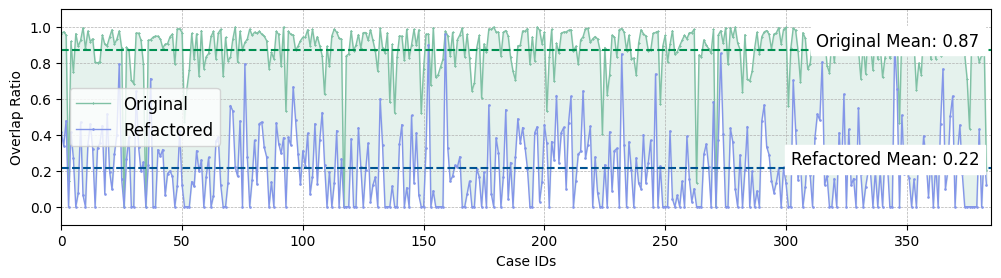

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
# np.random.seed(42)
index = np.arange(384)
# values1 = np.random.uniform(0.3, 1, 384)
# values2 = np.random.uniform(0.2, 0.6, 384)
values1, values2 = dataAtag[0][0], dataAtag[1][0]

# 创建图形和轴
fig, ax = plt.subplots(figsize=(12, 2.8))

# 绘制两条趋势线，调整线条和点的大小
shadow_colors = ['#8496E9', '#80C1A5', '#7DB7A2', 'steelblue']
ax.plot(index, values1, label='Original', color=shadow_colors[1], linewidth=1, marker='x', markersize=0.9)
ax.plot(index, values2, label='Refactored', color=shadow_colors[0], linewidth=1, marker='o', markersize=0.9)

# plot scatters whenever values1 < values2, and color them with red x
# for i in range(384):
#     if values1[i] <= values2[i]:
#         ax.scatter(i, values1[i]+0.1, color='red', marker='x', s=30)


# 计算累积平均值
# accumulated_average1 = np.cumsum(values1) / (np.arange(384) + 1)
# accumulated_average2 = np.cumsum(values2) / (np.arange(384) + 1)

ax.fill_between(index, values2, values1, color=shadow_colors[1], alpha=0.2) # , label='Accumulated Average (Original)'
# ax.fill_between(index, np.array([0] * 384), values2, color=shadow_colors[0], alpha=0.2) #, label='Accumulated Average (Refactored)'

# 画两条水平线，高度为两组数据的平均值
ax.axhline(y=np.mean(values1), color='#009051', linestyle='--', linewidth=1.5, alpha=1)
ax.axhline(y=np.mean(values2), color='#005493', linestyle='--', linewidth=1.5, alpha=1)

# 写上平均值在水平线上，文字有背景颜色, 背景颜色透明度为0.5
ax.text(380, np.mean(values1), f'Original Mean: {np.mean(values1):.2f}', ha='right', va='bottom', color='black', fontsize=12, backgroundcolor='white', alpha=1)
ax.text(380, np.mean(values2), f'Refactored Mean: {np.mean(values2):.2f}', ha='right', va='bottom', color='black', fontsize=12, backgroundcolor='white', alpha=1)

# 添加标签和标题
ax.set_xlabel('Case IDs')
ax.set_ylabel('Overlap Ratio')
# ax.set_title('N-gram Overlap Comparison')
ax.legend(loc='center left', fontsize=12)
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(0, 385)

# 显示网格
ax.grid(True, linestyle='--', linewidth=0.5)

# 显示图形
# plt.show()
plt.savefig('../Figure/RQ1-2.png', bbox_inches='tight', pad_inches=0.1)

## RQ2

In [9]:
pathAtag = [
 ('../data-classlevel/overlap_v1/overlapclass_324_norefactorsraw.txt', 'Original'),
 ('../data-classlevel/overlap_v1/overlapclass_324_funcifs.txt', 'IFF'),
 ('../data-classlevel/overlap_v1/overlapclass_324_funcloops.txt', 'Loop'),
 ('../data-classlevel/overlap_v1/overlapclass_324_funclist2range.txt', 'Iter'),
 ('../data-classlevel/overlap_v1/overlapclass_324_funccommlaw.txt', 'Comm'),
 ('../data-classlevel/overlap_v1/overlapclass_324_methodshuffles.txt', 'Shuf'),
 ('../data-classlevel/overlap_v1/overlapclass_324_funcfndecorators.txt', 'Deco'),
 ('../data-classlevel/overlap_v1/overlapclass_324_funcparams.txt', 'Param'),
 ('../data-classlevel/overlap_v1/overlapclass_324_appendashuffle.txt', 'Inhr'),
 ('../data-classlevel/overlap_v1/overlapclass_324_funcvarrenamers.txt', 'Renm'),
 ('../data-classlevel/overlap_v1/overlapclass_324_norefactors.txt','Norm'),
 ('../data-classlevel/overlap_v1/overlapclass_324_funccamelsnakeexchange.txt', 'Styl'),
]

dataAtag = []
for path, tag in pathAtag:
    with open(path) as f:
        question_id = None
        qid2overlaprate = {}
        for line in f.readlines():
            if line.startswith('Question ID: '):
                assert question_id is None
                question_id = line[len("Question ID: "):].strip()
            if line.startswith('<Overlap Ratio: '):
                assert question_id is not None
                assert question_id not in qid2overlaprate
                qid2overlaprate[question_id] = float(line.split('<Overlap Ratio: ')[1].split('>')[0])
                question_id = None
        qidAoverlaprate = sorted(list(qid2overlaprate.items()), key= lambda x: x[0])
#         print(tag)
#         print(qidAoverlaprate[:2])
    dataAtag.append( (np.array([o for q, o in qidAoverlaprate]), tag) )
    print(tag, len(dataAtag[-1][0]), sep='\t')

Original	324
IFF	324
Loop	324
Iter	324
Comm	324
Shuf	324
Deco	324
Param	324
Inhr	324
Renm	324
Norm	324
Styl	324


/tmp/ipykernel_3669650/2520897840.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  height = means[i]
/tmp/ipykernel_3669650/2520897840.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=data.mean()[0], color=shadow_colors[1], linestyle='--', linewidth=1.5, alpha=0.7)
/tmp/ipykernel_3669650/2520897840.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(1.48, data.mean()[0], f'Original Mean: {data.mean()[0]

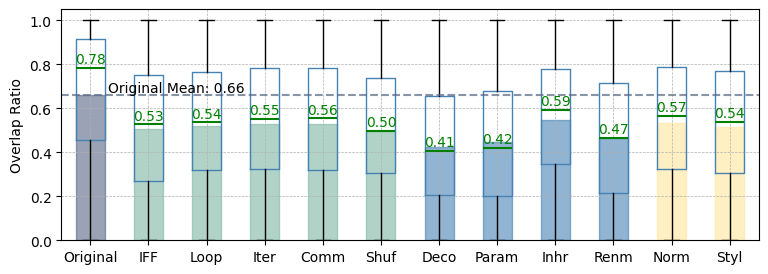

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.DataFrame({tag: data for data, tag in dataAtag})

# Box plot data
box_data = [data[col] for col in data.columns]

# Bar plot data (means)
means = data.mean()
medians = data.median()

# Create figure and axis
fig, ax = plt.subplots(figsize=(9, 3))

# Bar plot with shadow areas
# NOTES: These are four colors for four RQs !!!
# shadow_colors = ['#DA6883', '#566684', '#7DB7A2', 'steelblue']
shadow_colors = ['#DA6883', '#566684', '#7DB7A2', 'steelblue', '#FFE69B']
bars = ax.bar(data.columns, means, alpha=0, color=shadow_colors[3], label='Mean')
ax.set_ylabel('Overlap Ratio')

# Box plot
ax.boxplot(box_data, 
           positions=np.arange(len(data.columns)), 
           widths=0.5, 
           showfliers=True,
           medianprops=dict(linestyle='-', linewidth=1.5, color='green'),
           boxprops=dict(color='steelblue')
           )

# Add shadow areas using the mean of each bar
# for i, bar in enumerate(bars):
#     height = means[i]
#     ax.fill_between([i - 0.25, i + 0.25], 0, height, color='#566684', alpha=0.2)

# Add shadow areas using the mean of each bar
for i, bar in enumerate(bars):
    if i in [0]:
        cur_color = shadow_colors[1]
    elif i in [1, 2, 3, 4, 5]:
        cur_color = shadow_colors[2]
    elif i in [6, 7, 8, 9]:
        cur_color = shadow_colors[3]
    else:
        cur_color = shadow_colors[4]
        
    height = means[i]
    ax.fill_between([i - 0.25, i + 0.25], 0, height, color=cur_color, alpha=0.6)

# Set x-ticks
ax.set_xticks(np.arange(len(data.columns)))
ax.set_xticklabels(data.columns)

# write texts in the bars
for i, mean in enumerate(medians):
    ax.text(i, mean + 0.006, f'{mean:.2f}', ha='center', va='bottom', color='green', fontsize=10)

# add a horizontal line
ax.axhline(y=data.mean()[0], color=shadow_colors[1], linestyle='--', linewidth=1.5, alpha=0.7) 
# add a text
ax.text(1.48, data.mean()[0], f'Original Mean: {data.mean()[0]:.2f}', ha='center', va='bottom', color='black', fontsize=10)
ax.set_ylim(0, 1.05)

# Show grid
ax.grid(True, linestyle='--', linewidth=0.5)

# Show plot
# plt.title('Combined Bar and Box Plot with Mean Shading')
# plt.show()
plt.savefig('../Figure/RQ2.png', bbox_inches='tight', pad_inches=0)

In [3]:
pathAtag = [
 ('../data-classlevel/overlap_v1/overlapclass_324_norefactorsraw.txt', 'Original'),
 ('../data-classlevel/overlap_v1/overlapclass_324_all.txt', 'Refactored'),
]

dataAtag = []
for path, tag in pathAtag:
    with open(path) as f:
        question_id = None
        qid2overlaprate = {}
        for line in f.readlines():
            if line.startswith('Question ID: '):
                assert question_id is None
                question_id = line[len("Question ID: "):].strip()
            if line.startswith('<Overlap Ratio: '):
                assert question_id is not None
                assert question_id not in qid2overlaprate
                qid2overlaprate[question_id] = float(line.split('<Overlap Ratio: ')[1].split('>')[0])
                question_id = None
        qidAoverlaprate = sorted(list(qid2overlaprate.items()), key= lambda x: x[0])
        print(tag)
        print(qidAoverlaprate[123:128])
    dataAtag.append( (np.array([o for q, o in qidAoverlaprate]), tag) )
    print(tag, len(dataAtag[-1][0]), sep='\t')

Original
[('pandas/pandas.core.arrays.boolean/BooleanArray', 0.7758056982718355), ('pandas/pandas.core.arrays.categorical/CategoricalAccessor', 0.8579205225911812), ('pandas/pandas.core.arrays.datetimelike/TimelikeOps', 0.5446670276123443), ('pandas/pandas.core.arrays.floating/FloatingArray', 0.8608124253285544), ('pandas/pandas.core.arrays.integer/Int32Dtype', 0.34210526315789475)]
Original	324
Refactored
[('pandas/pandas.core.arrays.boolean/BooleanArray', 0.5573849878934625), ('pandas/pandas.core.arrays.categorical/CategoricalAccessor', 0.6355624675997926), ('pandas/pandas.core.arrays.datetimelike/TimelikeOps', 0.02615062761506276), ('pandas/pandas.core.arrays.floating/FloatingArray', 0.644916540212443), ('pandas/pandas.core.arrays.integer/Int32Dtype', 0.34210526315789475)]
Refactored	324


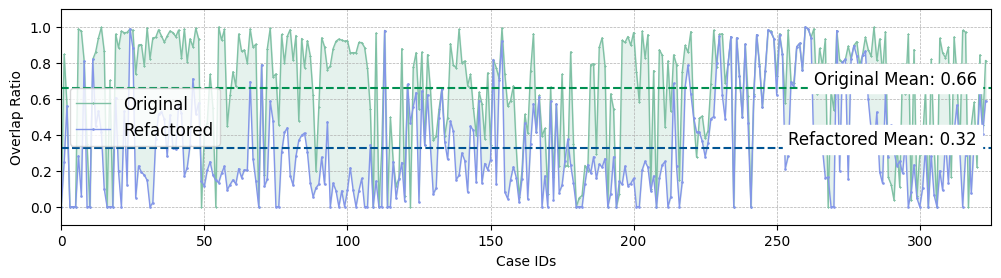

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
# np.random.seed(42)
index = np.arange(324)
# values1 = np.random.uniform(0.3, 1, 324)
# values2 = np.random.uniform(0.2, 0.6, 324)
values1, values2 = dataAtag[0][0], dataAtag[1][0]

# 创建图形和轴
fig, ax = plt.subplots(figsize=(12, 2.8))

# 绘制两条趋势线，调整线条和点的大小
shadow_colors = ['#8496E9', '#80C1A5', '#7DB7A2', 'steelblue']
ax.plot(index, values1, label='Original', color=shadow_colors[1], linewidth=1, marker='x', markersize=0.9)
ax.plot(index, values2, label='Refactored', color=shadow_colors[0], linewidth=1, marker='o', markersize=0.9)

# plot scatters whenever values1 < values2, and color them with red x
# for i in range(324):
#     if values1[i] <= values2[i]:
#         ax.scatter(i, values1[i]+0.1, color='red', marker='x', s=30)


# 计算累积平均值
# accumulated_average1 = np.cumsum(values1) / (np.arange(324) + 1)
# accumulated_average2 = np.cumsum(values2) / (np.arange(324) + 1)

ax.fill_between(index, values2, values1, color=shadow_colors[1], alpha=0.2) # , label='Accumulated Average (Original)'
# ax.fill_between(index, np.array([0] * 324), values2, color=shadow_colors[0], alpha=0.2) #, label='Accumulated Average (Refactored)'

# 画两条水平线，高度为两组数据的平均值
ax.axhline(y=np.mean(values1), color='#009051', linestyle='--', linewidth=1.5, alpha=1)
ax.axhline(y=np.mean(values2), color='#005493', linestyle='--', linewidth=1.5, alpha=1)

# 写上平均值在水平线上，文字有背景颜色, 背景颜色透明度为0.5
ax.text(320, np.mean(values1), f'Original Mean: {np.mean(values1):.2f}', ha='right', va='bottom', color='black', fontsize=12, backgroundcolor='white', alpha=1)
ax.text(320, np.mean(values2), f'Refactored Mean: {np.mean(values2):.2f}', ha='right', va='bottom', color='black', fontsize=12, backgroundcolor='white', alpha=1)

# 添加标签和标题
ax.set_xlabel('Case IDs')
ax.set_ylabel('Overlap Ratio')
# ax.set_title('N-gram Overlap Comparison')
ax.legend(loc='center left', fontsize=12)
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(0, 325)

# 显示网格
ax.grid(True, linestyle='--', linewidth=0.5)

# 显示图形
# plt.show()
plt.savefig('../Figure/RQ2-2.png', bbox_inches='tight', pad_inches=0.1)

## RQ3 - Annual Overlap Across Different Programming Languages

In [56]:
pathAtag = [
 ('../data-year/overlap_v1/overlapc-2018.txt', 'c-2018'),
 ('../data-year/overlap_v1/overlapc-2019.txt', 'c-2019'),
 ('../data-year/overlap_v1/overlapc-2020.txt', 'c-2020'),
 ('../data-year/overlap_v1/overlapc-2021.txt', 'c-2021'),
 ('../data-year/overlap_v1/overlapc-2022.txt', 'c-2022'),
 ('../data-year/overlap_v1/overlapjava-2018.txt', 'java-2018'),
 ('../data-year/overlap_v1/overlapjava-2019.txt', 'java-2019'),
 ('../data-year/overlap_v1/overlapjava-2020.txt', 'java-2020'),
 ('../data-year/overlap_v1/overlapjava-2021.txt', 'java-2021'),
 ('../data-year/overlap_v1/overlapjava-2022.txt', 'java-2022'),
 ('../data-year/overlap_v1/overlappython-2018.txt', 'python-2018'),
 ('../data-year/overlap_v1/overlappython-2019.txt', 'python-2019'),
 ('../data-year/overlap_v1/overlappython-2020.txt', 'python-2020'),
 ('../data-year/overlap_v1/overlappython-2021.txt', 'python-2021'),
 ('../data-year/overlap_v1/overlappython-2022.txt', 'python-2022'),
 ('../data-year/overlap_v1/overlaprust-2018.txt', 'rust-2018'),
 ('../data-year/overlap_v1/overlaprust-2019.txt', 'rust-2019'),
 ('../data-year/overlap_v1/overlaprust-2020.txt', 'rust-2020'),
 ('../data-year/overlap_v1/overlaprust-2021.txt', 'rust-2021'),
 ('../data-year/overlap_v1/overlaprust-2022.txt', 'rust-2022')]

dataAtag = []
for path, tag in pathAtag:
    with open(path) as f:
        question_id = None
        qid2overlaprate = {}
        for line in f.readlines():
            if line.startswith('Question ID: '):
                assert question_id is None
                question_id = line[len("Question ID: "):].strip()
            if line.startswith('<Overlap Ratio: '):
                assert question_id is not None
                assert question_id not in qid2overlaprate
                qid2overlaprate[question_id] = float(line.split('<Overlap Ratio: ')[1].split('>')[0])
                question_id = None
        qidAoverlaprate = sorted(list(qid2overlaprate.items()), key= lambda x: x[0])
#         print(tag)
#         print(qidAoverlaprate[:2])
    dataAtag.append( (np.array([o for q, o in qidAoverlaprate]), tag) )
    print(tag, len(dataAtag[-1][0]), sep='\t')

c-2018	384
c-2019	384
c-2020	384
c-2021	384
c-2022	384
java-2018	384
java-2019	384
java-2020	384
java-2021	384
java-2022	384
python-2018	384
python-2019	384
python-2020	384
python-2021	384
python-2022	384
rust-2018	384
rust-2019	384
rust-2020	384
rust-2021	384
rust-2022	384


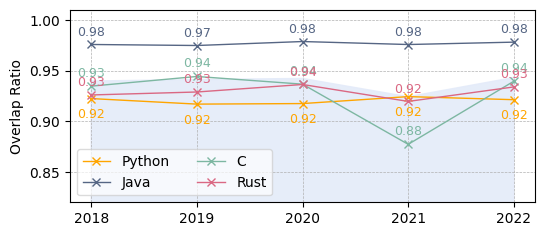

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = ['2018', '2019', '2020', '2021', '2022']
# values1 = [3.0, 3.2, 2.8, 2.5, 3.0]
# values2 = [2.0, 2.1, 2.6, 2.8, 2.9]
# values3 = [2.5, 2.7, 2.6, 2.9, 3.1]
# values4 = [1.5, 1.6, 1.4, 1.5, 1.7]
values1 = [np.median(data) for data, tag in dataAtag if tag.startswith("python-")]
values2 = [np.median(data) for data, tag in dataAtag if tag.startswith("java-")]
values3 = [np.median(data) for data, tag in dataAtag if tag.startswith("c-")]
values4 = [np.median(data) for data, tag in dataAtag if tag.startswith("rust-")]

# Calculate average
average_values = np.mean([values1, values2, values3, values4], axis=0)

# Create plot
fig, ax = plt.subplots(figsize=(6, 2.5))

# Add shadow shape for average
ax.fill_between(years, average_values, color='#E4EBF9', alpha=0.9)


# Plot lines
ax.plot(years, values1, 'x-', color='orange', label='Python', linewidth=1, markersize=6)
for i, val in enumerate(values1):
    ax.text(i, val - 0.022, f'{val:.2f}', ha='center', va='bottom', color='orange', fontsize=9)
    
ax.plot(years, values2, 'x-', color='#566684', label='Java', linewidth=1, markersize=6)
for i, val in enumerate(values2):
    ax.text(i, val + 0.006, f'{val:.2f}', ha='center', va='bottom', color='#566684', fontsize=9)
    
ax.plot(years, values3, 'x-', color='#7DB7A2', label='C', linewidth=1, markersize=6)
for i, val in enumerate(values3):
    ax.text(i, val + 0.0066, f'{val:.2f}', ha='center', va='bottom', color='#7DB7A2', fontsize=9)
    
ax.plot(years, values4, 'x-', color='#DA6883', label='Rust', linewidth=1, markersize=6)
for i, val in enumerate(values4):
    ax.text(i, val + 0.006, f'{val:.2f}', ha='center', va='bottom', color='#DA6883', fontsize=9)


# Add title and labels
# ax.set_title('N-gram Overlap Changing Over Time', fontsize=12, color='black')
ax.set_ylim(0.82, 1.01)
ax.set_ylabel('Overlap Ratio')

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
ax.legend(framealpha=0.7, ncol=2, loc='lower left')

# Show plot
# plt.show()
plt.savefig('../Figure/RQ3.png', bbox_inches='tight', pad_inches=0)

# RQ4

In [3]:
pathAtag = [
 ('../data-java-new/overlap_v1/overlapinfill_java2021.txt', 'java-Original'),
 ('../data-java-new/overlap_v1/overlapinfill_java2021-refactor-IfBranchFlipper.txt', 'java-IFF'),
 ('../data-java-new/overlap_v1/overlapinfill_java2021-refactor-LoopSubstitutor.txt', 'java-Loop'),
 ('../data-java-new/overlap_v1/overlapinfill_java2021-refactor-VarRenamer.txt', 'java-Renm'),
 ('../data-java-new/overlap_v1/overlapinfill_java2021-refactor-CommentRemover.txt','java-Norm'),

 ('../data/overlap_v1_2021new/overlapinfill_refactor_norefactorsraw.txt', 'python-Original'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_if.txt', 'python-IFF'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_loop.txt', 'python-Loop'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_var-renamer.txt', 'python-Renm'),
 ('../data/overlap_v1_2021new/overlapinfill_refactor_norefactors.txt','python-Norm'),
]

dataAtag = []
for path, tag in pathAtag:
    with open(path) as f:
        question_id = None
        qid2overlaprate = {}
        for line in f.readlines():
            if line.startswith('Question ID: '):
                assert question_id is None
                question_id = line[len("Question ID: "):].strip()
            if line.startswith('<Overlap Ratio: '):
                assert question_id is not None
                assert question_id not in qid2overlaprate
                qid2overlaprate[question_id] = float(line.split('<Overlap Ratio: ')[1].split('>')[0])
                question_id = None
        qidAoverlaprate = sorted(list(qid2overlaprate.items()), key= lambda x: x[0])
#         print(tag)
#         print(qidAoverlaprate[:2])
    dataAtag.append( (np.array([o for q, o in qidAoverlaprate]), tag) )
    print(tag, len(dataAtag[-1][0]), sep='\t')

java-Original	384
java-IFF	384
java-Loop	384
java-Renm	384
java-Norm	384
python-Original	384
python-IFF	384
python-Loop	384
python-Renm	384
python-Norm	384


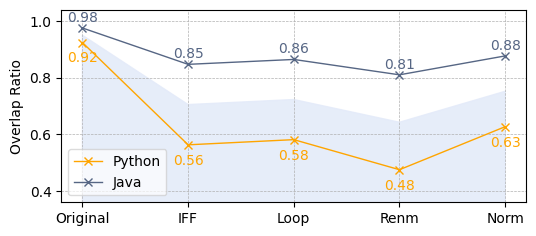

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = ['Original', 'IFF', 'Loop', 'Renm', 'Norm']
values1 = [np.median(data) for data, tag in dataAtag if tag.startswith("python-")]
values2 = [np.median(data) for data, tag in dataAtag if tag.startswith("java-")]

# Calculate average
average_values = np.mean([values1, values2], axis=0)

# Create plot
fig, ax = plt.subplots(figsize=(6, 2.5))

# Add shadow shape for average
ax.fill_between(years, average_values, color='#E4EBF9', alpha=0.9)


# Plot lines
ax.plot(years, values1, 'x-', color='orange', label='Python', linewidth=1, markersize=6)
for i, val in enumerate(values1):
    ax.text(i, val - 0.08, f'{val:.2f}', ha='center', va='bottom', color='orange', fontsize=10)
    
ax.plot(years, values2, 'x-', color='#566684', label='Java', linewidth=1, markersize=6)
for i, val in enumerate(values2):
    ax.text(i, val + 0.012, f'{val:.2f}', ha='center', va='bottom', color='#566684', fontsize=10)


# Add title and labels
# ax.set_title('N-gram Overlap Changing Over Time', fontsize=12, color='black')
ax.set_ylim(0.36, 1.04)
ax.set_ylabel('Overlap Ratio')

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
ax.legend(framealpha=0.7, ncol=1, loc='lower left')

# Show plot
# plt.show()
plt.savefig('../Figure/RQ4.png', bbox_inches='tight', pad_inches=0)